In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_insurance.csv')
df

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,0-9y,high school,upper class,0.629027,1,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,0-9y,none,poverty,0.357757,0,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,0-9y,high school,working class,0.493146,1,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,0-9y,university,working class,0.206013,1,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,10-19y,none,working class,0.388366,1,0,0,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,10-19y,university,upper class,0.582787,1,0,0,10238,16000.0,sedan,0,0,1,0
9996,910346,26-39,female,10-19y,none,middle class,0.522231,1,0,1,32765,NaN,sedan,1,0,0,0
9997,468409,26-39,male,0-9y,high school,middle class,0.470940,1,0,1,10238,14000.0,sedan,0,0,0,0
9998,903459,26-39,female,10-19y,high school,poverty,0.364185,0,0,1,10238,13000.0,sedan,2,0,1,1


In [3]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

# Data Cleaning

In [4]:
# Check NA 
missing_values = df.isna().sum()
print("NA counts:")
print(missing_values)

NA counts:
ID                       0
AGE                      0
GENDER                   0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

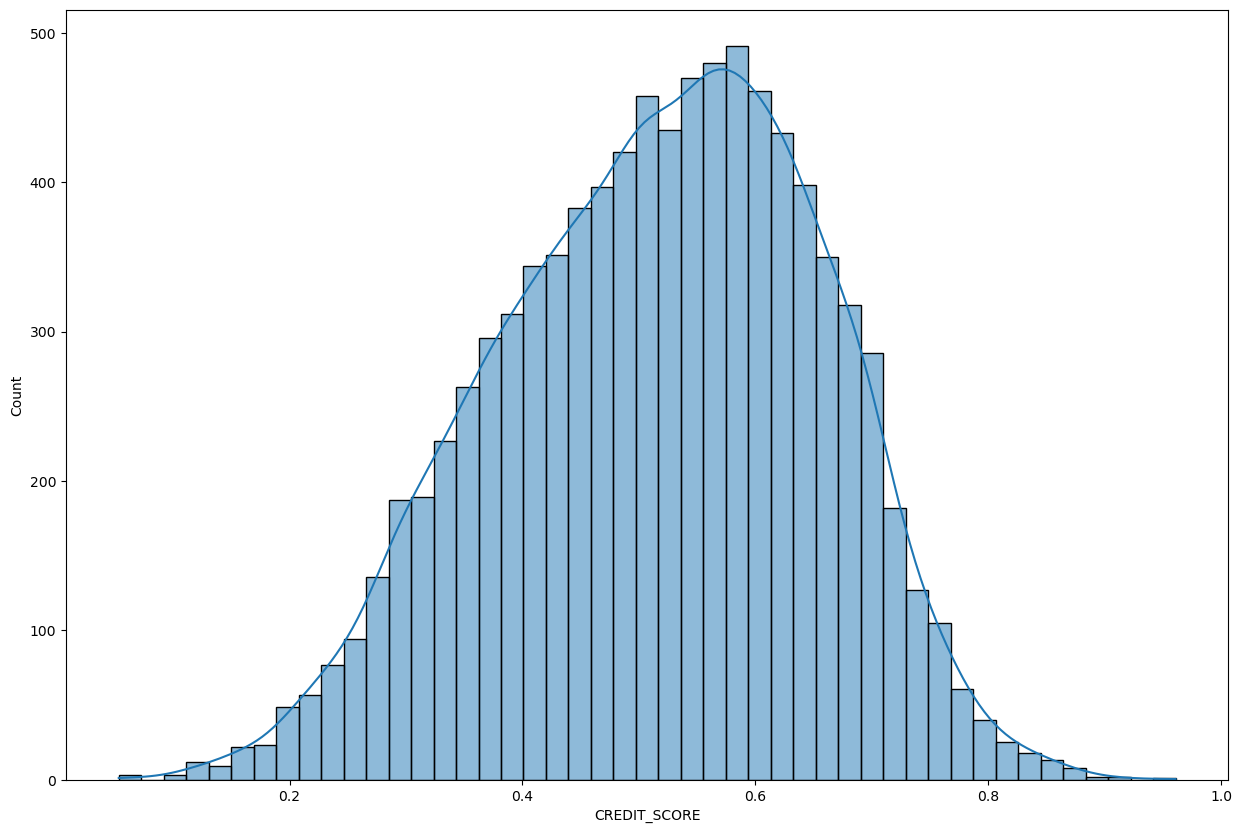

In [5]:
# CREDIT_SCORE
plt.figure(figsize=(15,10))
sns.histplot(df['CREDIT_SCORE'], kde=1)

In [6]:
# Replace missing values
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean())

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

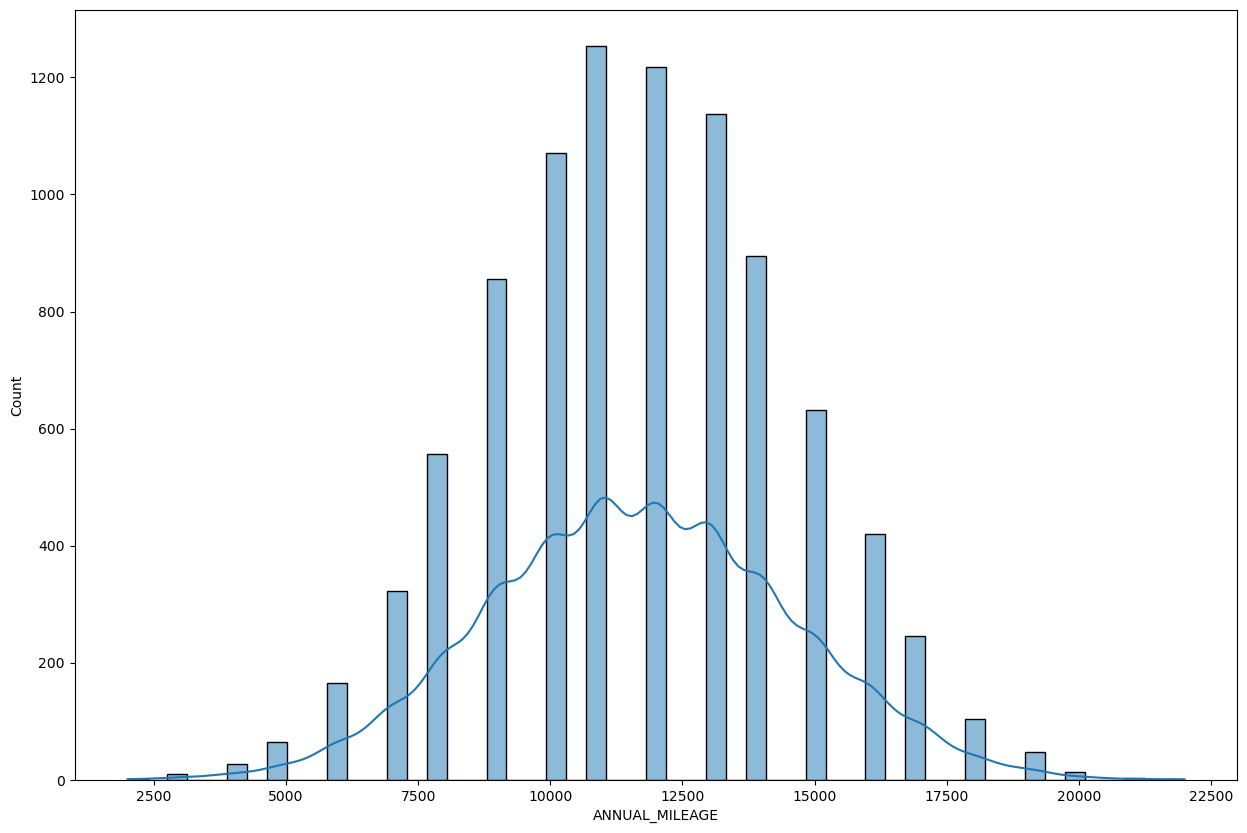

In [7]:
# ANNUAL_MILEAGE
plt.figure(figsize=(15,10))
sns.histplot(df['ANNUAL_MILEAGE'], kde=1)

In [8]:
# Replace missing values
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

In [9]:
# Verification
missing_values = df.isna().sum()
print("NA counts:")
print(missing_values)

NA counts:
ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


In [10]:
# Check unused columns
print(df['ID'].value_counts(dropna=False))

df = df.drop(['ID'], axis=1)

ID
569520    1
702473    1
426507    1
386239    1
454670    1
         ..
931908    1
672440    1
297005    1
559584    1
442696    1
Name: count, Length: 10000, dtype: int64


In [11]:
# Encoding
print(df['AGE'].value_counts(dropna=False), '\n')
print(df['GENDER'].value_counts(dropna=False), '\n')
print(df['DRIVING_EXPERIENCE'].value_counts(dropna=False), '\n')
print(df['EDUCATION'].value_counts(dropna=False), '\n')
print(df['INCOME'].value_counts(dropna=False), '\n')
print(df['VEHICLE_TYPE'].value_counts(dropna=False))

# Numerical Encoding
age_mapping = {'16-25': 0, '26-39': 1, '40-64': 2, '65+': 3}
df['AGE'].replace(age_mapping, inplace=True)

driving_mapping = {'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3}
df['DRIVING_EXPERIENCE'].replace(driving_mapping, inplace=True)

education_mapping = {'none': 0, 'high school': 1, 'university': 2}
df['EDUCATION'].replace(education_mapping, inplace=True)

income_mapping = {'poverty': 0, 'working class': 1, 'middle class': 2, 'upper class': 3}
df['INCOME'].replace(income_mapping, inplace=True)

# One-hot Encoding
df = pd.get_dummies(df, columns=['GENDER', 'VEHICLE_TYPE'], drop_first=False)

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64 

GENDER
female    5010
male      4990
Name: count, dtype: int64 

DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64 

EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64 

INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64 

VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64


# Modeling

In [12]:
print(df['OUTCOME'].value_counts(dropna=False))

OUTCOME
0    6867
1    3133
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardization
columns_to_standardize = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_female,GENDER_male,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,1.473333,-1.079662,-0.272981,0.957659,0.865914,1,0,1,-0.508946,0.102181,-0.661462,-0.43102,-0.639263,0,True,False,True,False
1,-1.452849,-1.079662,-1.629073,-1.653189,-1.208879,0,0,0,-0.508946,1.593875,-0.661462,-0.43102,-0.639263,1,False,True,True,False
2,-1.452849,-1.079662,-0.272981,-0.782906,-0.173367,1,0,0,-0.508946,-0.270742,-0.661462,-0.43102,-0.639263,0,True,False,True,False
3,-1.452849,-1.079662,1.083110,-0.782906,-2.369485,1,0,1,0.682034,-0.270742,-0.661462,-0.43102,-0.639263,0,False,True,True,False
4,-0.477455,-0.069972,-1.629073,-0.782906,-0.974770,1,0,0,0.682034,0.102181,0.230657,-0.43102,-0.034072,1,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.477455,-0.069972,1.083110,0.957659,0.512248,1,0,0,-0.508946,1.593875,-0.661462,-0.43102,-0.034072,0,True,False,True,False
9996,-0.477455,-0.069972,-1.629073,0.087376,0.049093,1,0,1,0.682034,0.102181,-0.215402,-0.43102,-0.639263,0,True,False,True,False
9997,-0.477455,-1.079662,-0.272981,0.087376,-0.343205,1,0,1,-0.508946,0.848028,-0.661462,-0.43102,-0.639263,0,False,True,True,False
9998,-0.477455,-0.069972,-0.272981,-1.653189,-1.159717,0,0,1,-0.508946,0.475105,0.230657,-0.43102,-0.034072,1,True,False,True,False


In [14]:
# Undersampling
# Split 1 & 0
positive_samples = df[df['OUTCOME'] == 1]
negative_samples = df[df['OUTCOME'] == 0]

# Randomly pick up same amount of 0
minority_count = len(positive_samples) # Count 0
negative_samples_undersampled = negative_samples.sample(n=minority_count, random_state=42)

# Concat and refresh
undersampled_df = pd.concat([positive_samples, negative_samples_undersampled])
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

# Data split
X_undersampled = undersampled_df.drop('OUTCOME', axis=1)
y_undersampled = undersampled_df['OUTCOME']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.20)

## Logistic Regression 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

# Create Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)

# Other metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[485 137]
 [109 523]]
Precision: 0.7924242424242425
Recall: 0.8275316455696202
Accuracy: 0.8038277511961722
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       622
           1       0.79      0.83      0.81       632

    accuracy                           0.80      1254
   macro avg       0.80      0.80      0.80      1254
weighted avg       0.80      0.80      0.80      1254



## Random Forest

Confusion Matrix:
[[501 121]
 [118 514]]
Precision: 0.809409699679355
Recall: 0.8094098883572568
Accuracy: 0.8094098883572568
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       622
           1       0.81      0.81      0.81       632

    accuracy                           0.81      1254
   macro avg       0.81      0.81      0.81      1254
weighted avg       0.81      0.81      0.81      1254

Feature Importance:
                    Feature  Importance
4              CREDIT_SCORE    0.178555
1        DRIVING_EXPERIENCE    0.152040
9            ANNUAL_MILEAGE    0.100763
0                       AGE    0.082149
5         VEHICLE_OWNERSHIP    0.074477
10      SPEEDING_VIOLATIONS    0.070797
8               POSTAL_CODE    0.066575
12           PAST_ACCIDENTS    0.065457
3                    INCOME    0.062987
2                 EDUCATION    0.037242
6                   MARRIED    0.025537
7                  CHILDREN    0.022877
11     

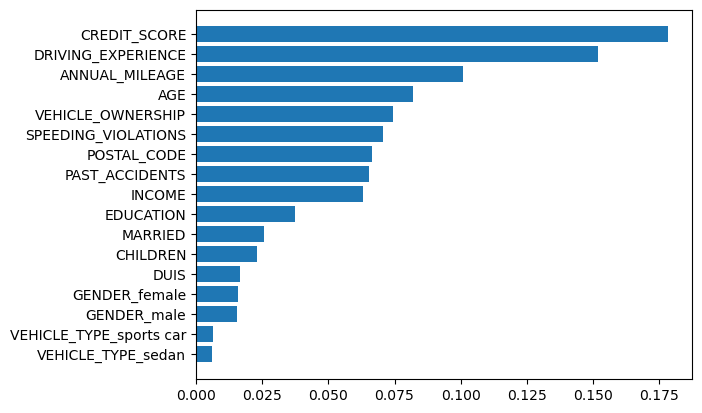

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:")
print(rf_cm)

# Other metrics
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("Accuracy:", rf_accuracy)

print(classification_report(y_test, rf_y_pred))

# Variable importance
rf_importances = rf_model.feature_importances_
feature_names = x_train.columns

# Create importance DataFrame
rf_feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(rf_feature_importances)

# Importance Plot
indices = np.argsort(rf_importances)
fig, ax = plt.subplots()
ax.barh(range(len(rf_importances)), rf_importances[indices])
ax.set_yticks(range(len(rf_importances)))
_ = ax.set_yticklabels(np.array(feature_names)[indices])